# *Importing Modules*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## *1.Reading The Data Frame*

In [3]:
data_frame=pd.read_csv(r'H:\StudentsPerformance.csv')
data_frame.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# First understanding the data 
# 1. gender == >  male or female 
# 2. race == >  Ethnicity of students → (Group A, B, C, D, E)
# 3. parent education == > the last degree he has owned
# 4. lunch == > before test (free/paid - standard)
# 5. test preperation == > complete or not complete 

## *2.information about the data*

In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## *3.Check Duplicates*

In [6]:
data_frame.duplicated().sum()

0

## *4.Unique Values*

In [7]:
data_frame.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

## *5.Summary of statistics*

In [8]:
data_frame.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
#From above description of numerical data, all means are very close to each other - between 66 and 68.05;
#All standard deviations are also close - between 14.6 and 15.19;
#While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

## *6.knowing the unique values in each columns*

In [12]:
columns_list=data_frame.columns
for col in columns_list:
    print(f'the unique values in {col} is {data_frame[col].unique()}')
    print()


the unique values in gender is ['female' 'male']

the unique values in race/ethnicity is ['group B' 'group C' 'group A' 'group D' 'group E']

the unique values in parental level of education is ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

the unique values in lunch is ['standard' 'free/reduced']

the unique values in test preparation course is ['none' 'completed']

the unique values in math score is [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]

the unique values in reading score is [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49

## *7.Knowing The numerical and categorical columns*

In [13]:
numerical_column=[col for col in columns_list if data_frame[col].dtype != 'O']
categorical_column=[col for col in columns_list if data_frame[col].dtype == 'O']
numerical_column

['math score', 'reading score', 'writing score']

In [14]:
categorical_column

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

## *8.Knowing the Average and Total Score*

In [15]:
data_frame['Total_score']=data_frame['math score']+data_frame['reading score']+data_frame['writing score']
data_frame['average_score']=(data_frame['math score']+data_frame['reading score']+data_frame['writing score'])/3
data_frame.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## *9.Number of student got the full mark*

In [18]:
my_dic={}
for col in numerical_column:
    my_dic.setdefault(col,len(data_frame[data_frame[col]==100]))
for k,v in my_dic.items():
    print(f'in {k} got full mark {v} students around {v*100/1000} % ')


in math score got full mark 7 students around 0.7 % 
in reading score got full mark 17 students around 1.7 % 
in writing score got full mark 14 students around 1.4 % 


## *10.Number of students who got Failed*

In [19]:
my_dic={}
for col in numerical_column:
    my_dic.setdefault(col,len(data_frame[data_frame[col]<50]))
for k,v in my_dic.items():
    print(f'in {k} got failed {v} students around {v*100/1000} % ')

in math score got failed 135 students around 13.5 % 
in reading score got failed 90 students around 9.0 % 
in writing score got failed 114 students around 11.4 % 


In [20]:
#From above values we get students have performed the worst in Maths
#Best performance is in reading section

## *11.Visualization for all Data set*

<Axes: >

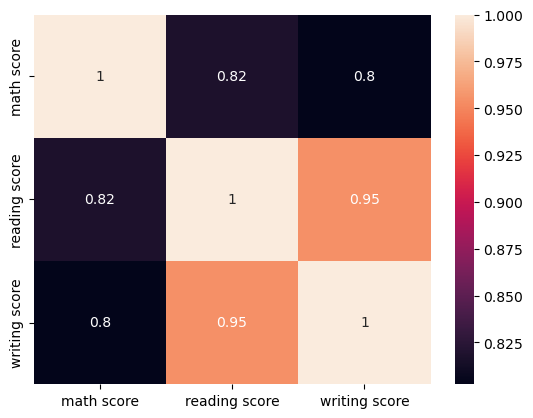

In [22]:
sns.heatmap(data_frame[numerical_column].corr(),annot=True)
# apply heat map for numerical columns only

<Axes: >

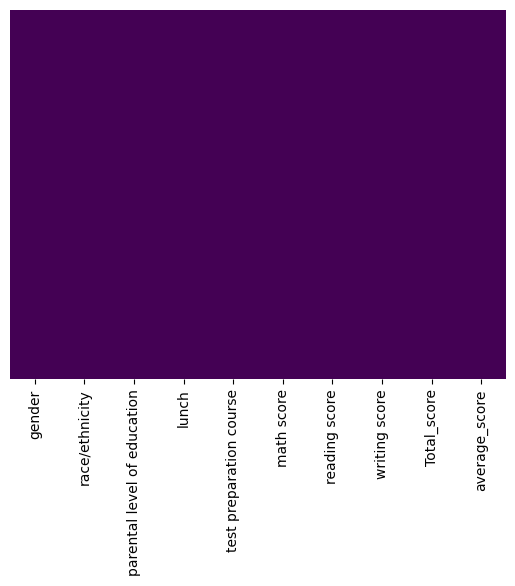

In [23]:
sns.heatmap(data_frame.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# there isnot any null values

H:\anaconda projects\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


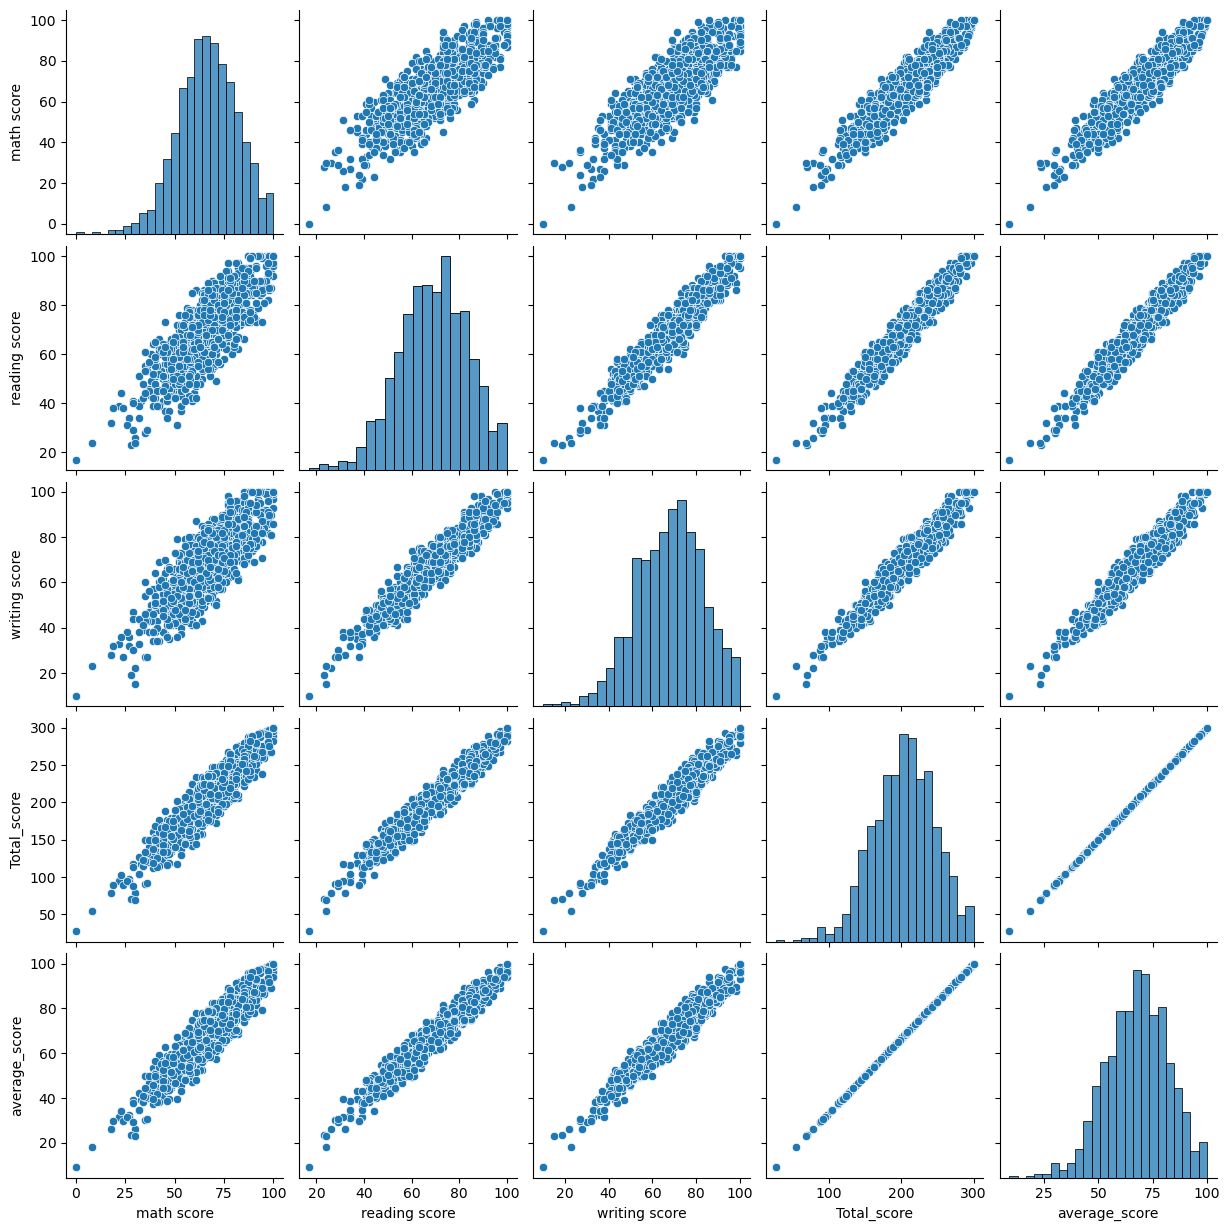

In [24]:
sns.pairplot(data_frame)

### *12.visualize average score*

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_36764\2799060287.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data_frame['average_score'])


Text(0.5, 0, 'Average_Score')

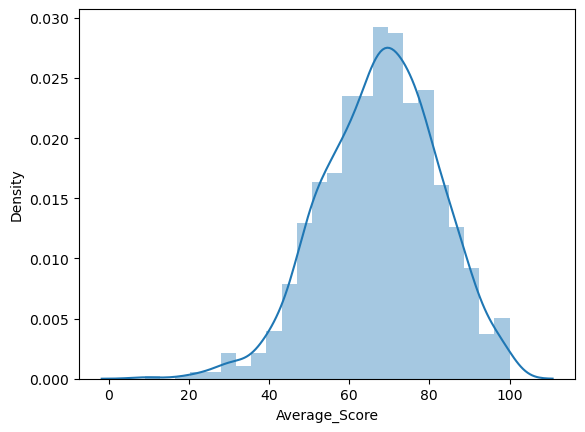

In [27]:
sns.distplot(x=data_frame['average_score'])
plt.xlabel('Average_Score')

<Axes: >

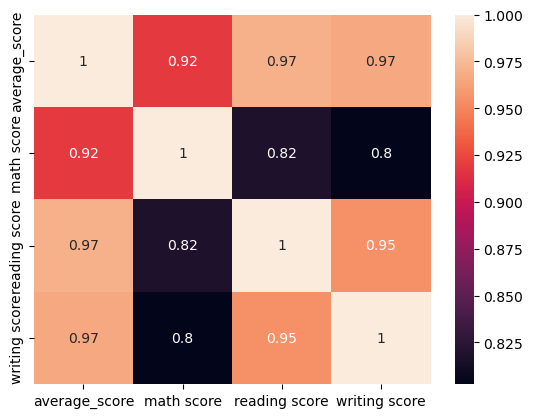

In [28]:
columns=['average_score','math score', 'reading score', 'writing score']
sns.heatmap(data_frame[columns].corr(),annot=True)

H:\anaconda projects\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


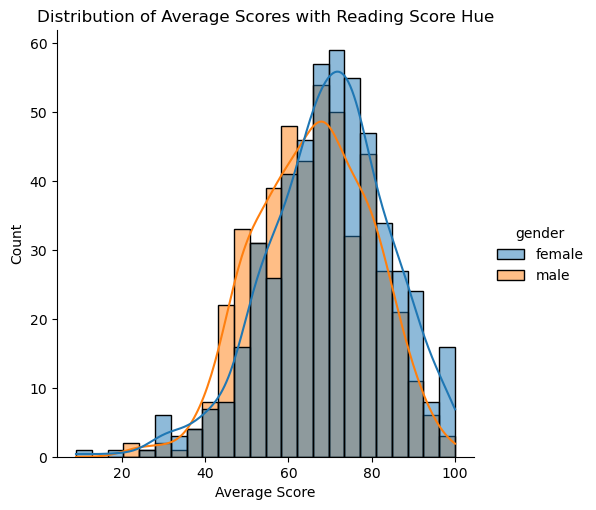

In [34]:
sns.displot(data_frame, x='average_score', hue='gender', kde=True)
plt.xlabel('Average Score')
plt.title('Distribution of Average Scores with Reading Score Hue')
plt.show()


In [35]:
#Female students tend to perform well then male students.

H:\anaconda projects\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


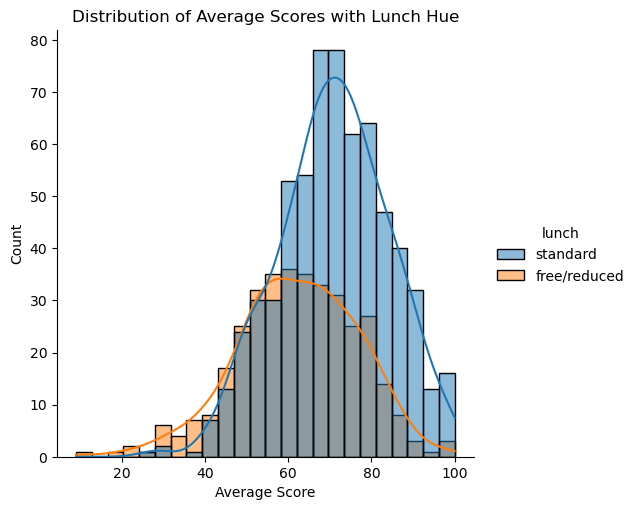

In [37]:
sns.displot(data_frame, x='average_score', hue='lunch', kde=True)
plt.xlabel('Average Score')
plt.title('Distribution of Average Scores with Lunch Hue')
plt.show()

In [38]:
#Standard lunch helps perform well in exams.

H:\anaconda projects\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
H:\anaconda projects\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


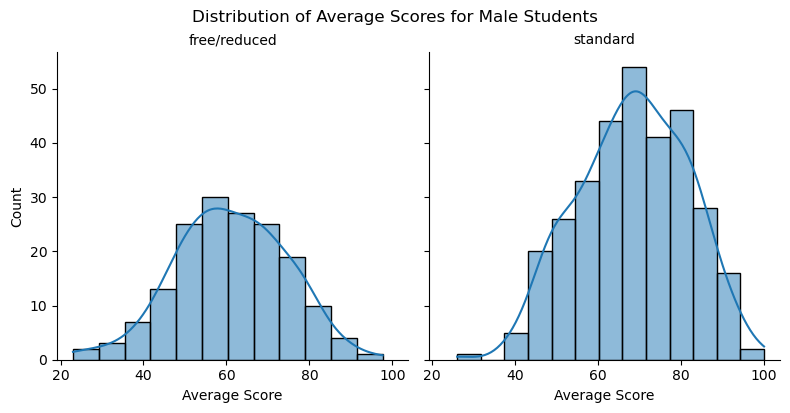

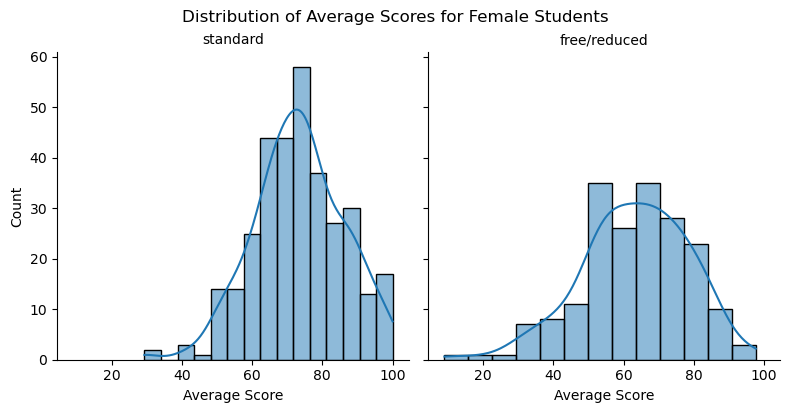

In [41]:
# Create a FacetGrid for male students
g_male = sns.FacetGrid(data_frame[data_frame['gender'] == 'male'], col="lunch", height=4, aspect=1)
g_male.map(sns.histplot, "average_score", kde=True).set_axis_labels("Average Score", "Count")
g_male.set_titles(col_template="{col_name}")
g_male.fig.suptitle('Distribution of Average Scores for Male Students', y=1.02)

# Create a FacetGrid for female students
g_female = sns.FacetGrid(data_frame[data_frame['gender'] == 'female'], col="lunch", height=4, aspect=1)
g_female.map(sns.histplot, "average_score", kde=True).set_axis_labels("Average Score", "Count")
g_female.set_titles(col_template="{col_name}")
g_female.fig.suptitle('Distribution of Average Scores for Female Students', y=1.02)

plt.show()


In [43]:
# Standard lunch helps perform well in exams be it a male or a female.

H:\anaconda projects\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


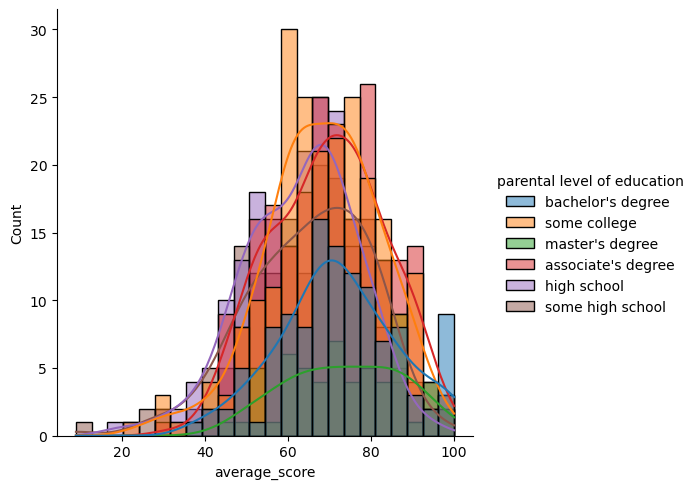

In [48]:
sns.displot(data_frame,x='average_score',hue='parental level of education',kde=True)

H:\anaconda projects\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
H:\anaconda projects\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 3000x2500 with 0 Axes>

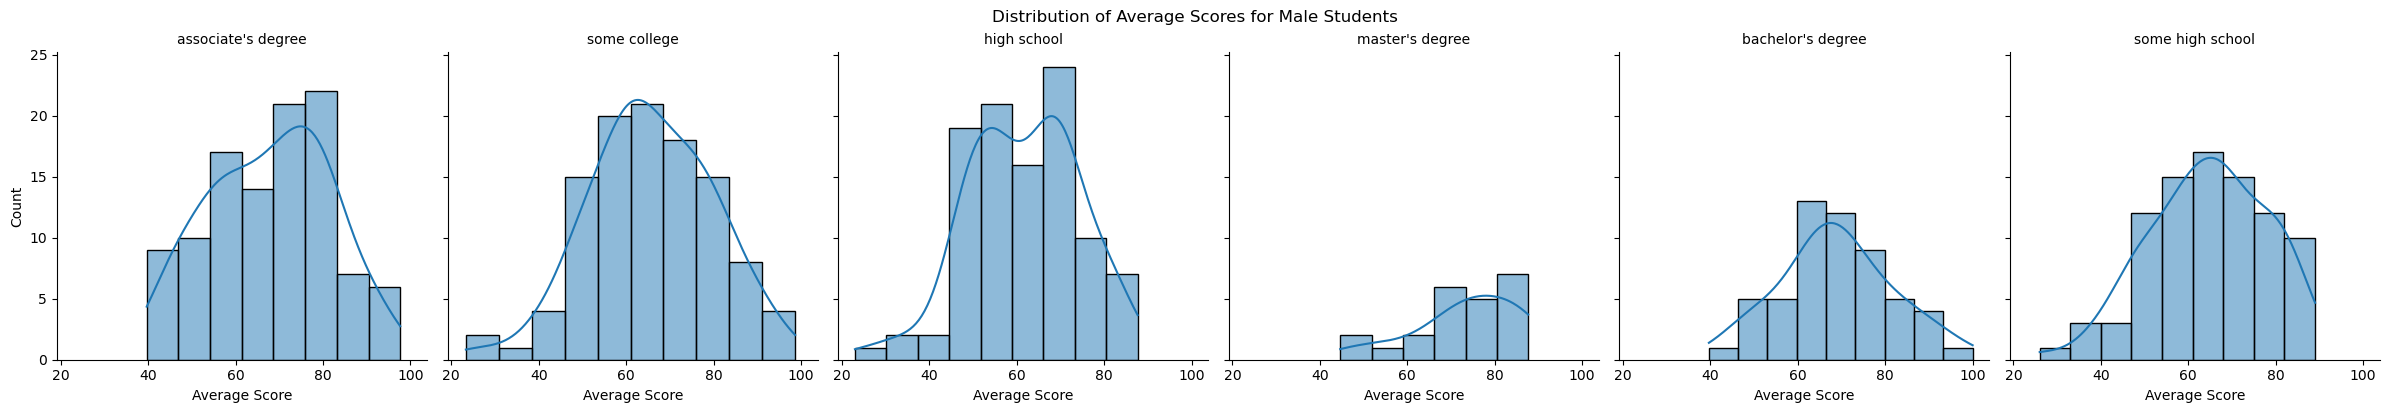

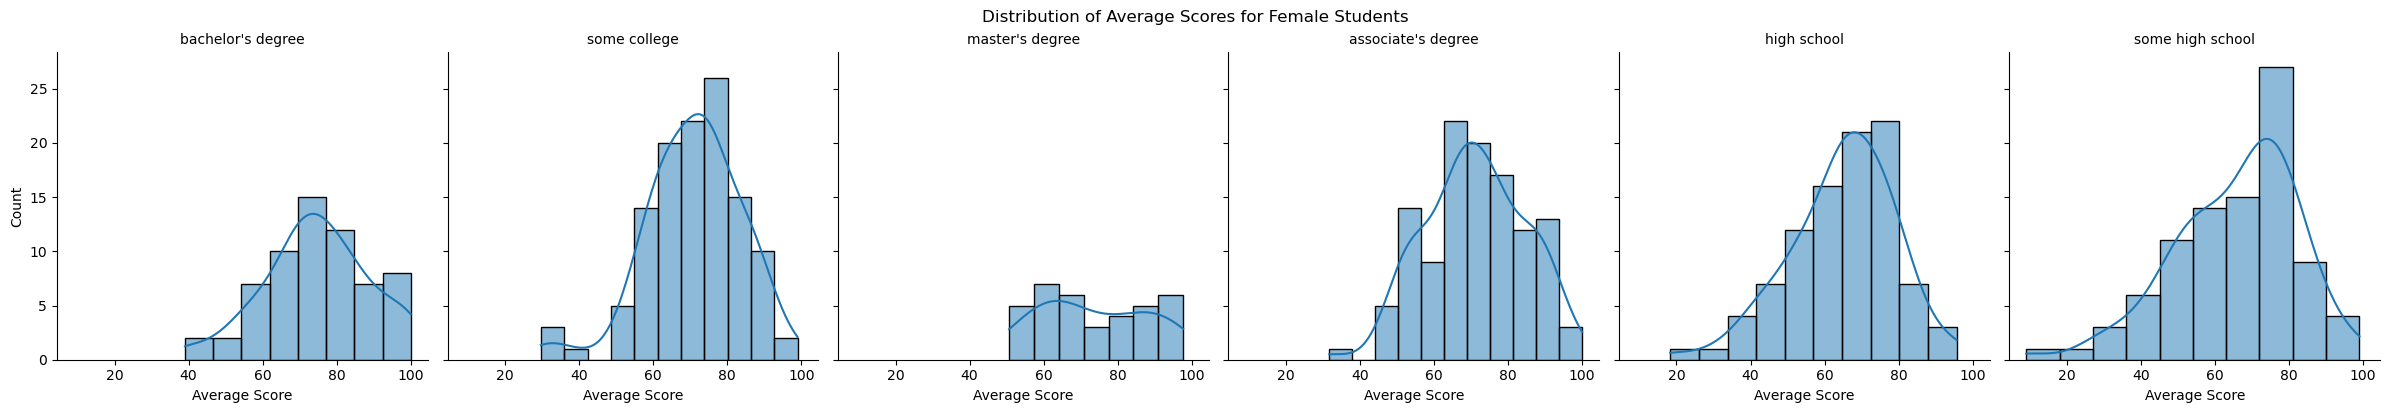

In [53]:
# Create a FacetGrid for male students
plt.figure(figsize=(30,25))
g_male = sns.FacetGrid(data_frame[data_frame['gender'] == 'male'], col="parental level of education", height=4, aspect=1)
g_male.map(sns.histplot, "average_score", kde=True).set_axis_labels("Average Score", "Count")
g_male.set_titles(col_template="{col_name}")
g_male.fig.suptitle('Distribution of Average Scores for Male Students', y=1.02)

# Create a FacetGrid for female students
g_female = sns.FacetGrid(data_frame[data_frame['gender'] == 'female'], col="parental level of education", height=4, aspect=1)
g_female.map(sns.histplot, "average_score", kde=True).set_axis_labels("Average Score", "Count")
g_female.set_titles(col_template="{col_name}")
g_female.fig.suptitle('Distribution of Average Scores for Female Students', y=1.02)

plt.show()

In [54]:
#In general parent's education don't help student perform well in exam

H:\anaconda projects\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


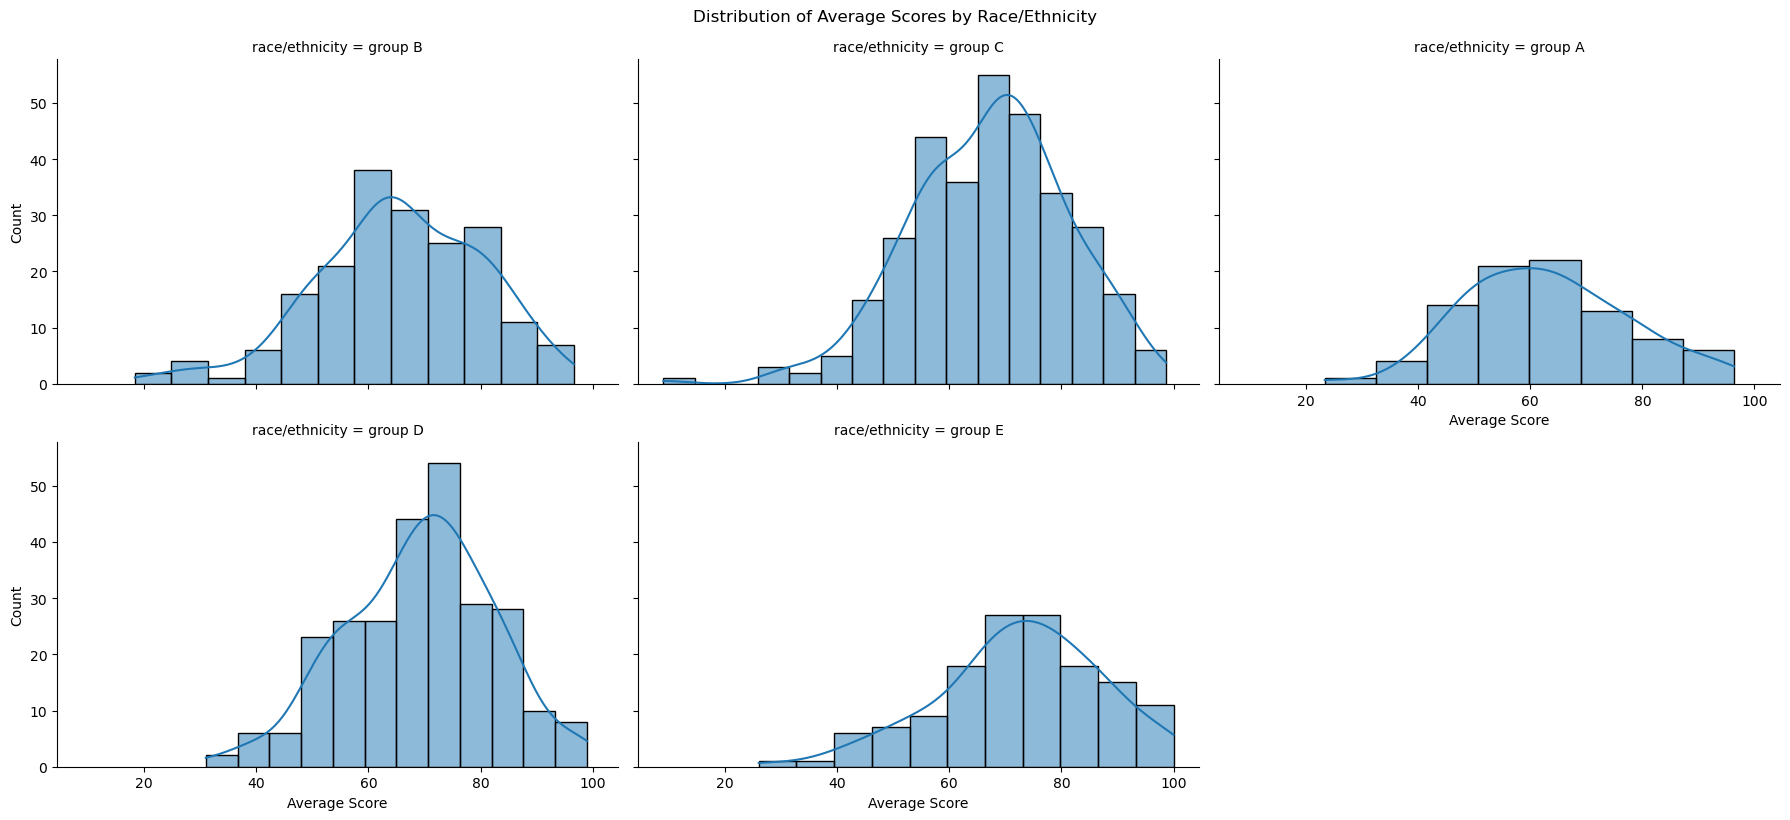

In [56]:
# Create a FacetGrid for each race/ethnicity
g = sns.FacetGrid(data_frame, col="race/ethnicity", height=4, aspect=1.5, col_wrap=3)
g.map(sns.histplot, 'average_score', kde=True).set_axis_labels("Average Score", "Count")

# Add a title to the overall figure
g.fig.suptitle('Distribution of Average Scores by Race/Ethnicity', y=1.02)

plt.show()


In [57]:
#Students of group A and group E tends to perform poorly in exam.
#Students of group A and group E tends to perform poorly in exam irrespective of whether they are male or female

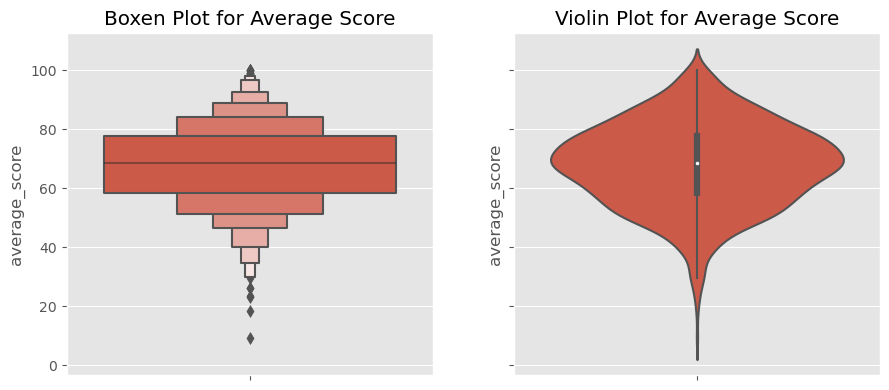

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style to 'ggplot'
plt.style.use('ggplot')

# Create subplots with boxen and violin plots
fig, axes = plt.subplots(1, 2, figsize=(9, 4), sharey=True)

# Boxen Plot
sns.boxenplot(data=data_frame, y='average_score', ax=axes[0])
axes[0].set_title('Boxen Plot for Average Score')

# Violin Plot
sns.violinplot(data=data_frame, y='average_score', ax=axes[1])
axes[1].set_title('Violin Plot for Average Score')

# Adjust layout for better spacing
plt.tight_layout(w_pad=4)  # Adjust w_pad to control the width space

# Show the plots
plt.show()


## *13.Visualize of Numerical columns*

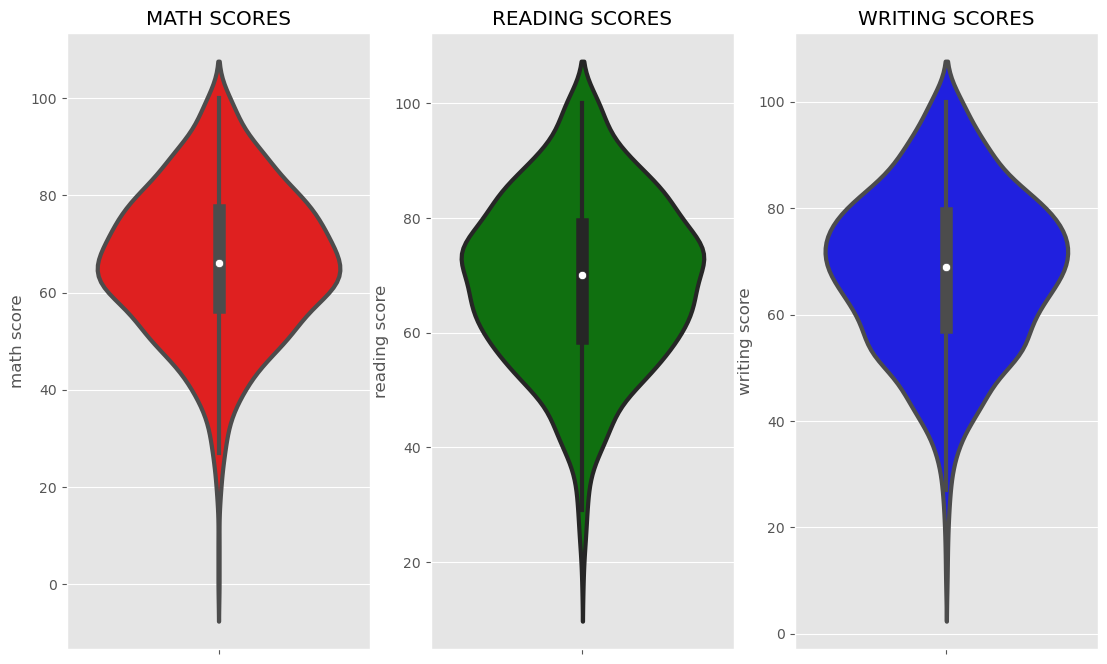

In [68]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=data_frame,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=data_frame,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=data_frame,color='blue',linewidth=3)
plt.show()

In [69]:
#From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

## *14.Visualize all categorical columns*

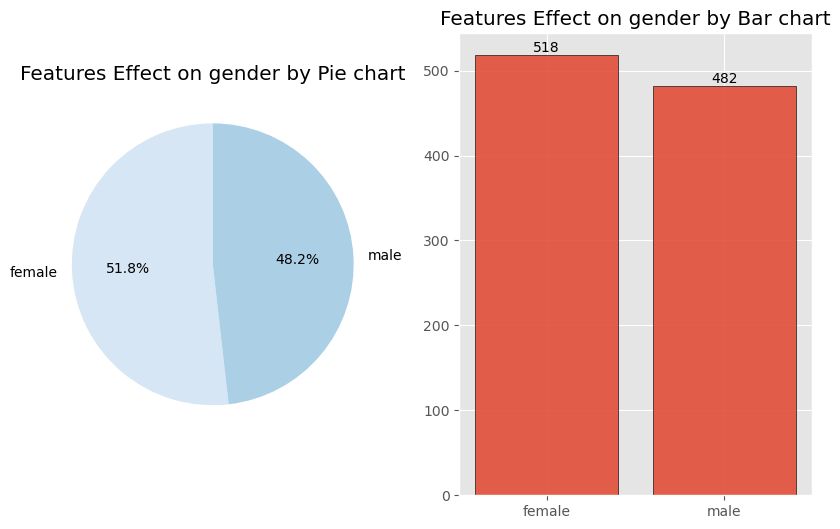

In [76]:
# Choose colors for each feature
colors = sns.color_palette("Blues", 5)

# Set up the figure with subplots
plt.figure(figsize=(10, 6))

# Plot the pie chart
plt.subplot(1, 2, 1)
plt.pie(data_frame[categorical_column[0]].value_counts().values, labels=data_frame[categorical_column[0]].value_counts().index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title(f'Features Effect on {categorical_column[0]} by Pie chart')

# Plot bar chart
plt.subplot(1, 2, 2)
bars = plt.bar(data_frame[categorical_column[0]].value_counts().index, data_frame[categorical_column[0]].value_counts().values, edgecolor='k', alpha=0.88)

# Text on bar chart
for xx,yy in zip(data_frame[categorical_column[0]].value_counts().index, data_frame[categorical_column[0]].value_counts().values):
    plt.text(xx,yy,np.round(yy,1), ha='center', va='bottom', fontsize=10)

plt.title(f'Features Effect on {categorical_column[0]} by Bar chart')

# Display the chart
plt.show()


In [77]:
# from two graphs the men is almost equal women 

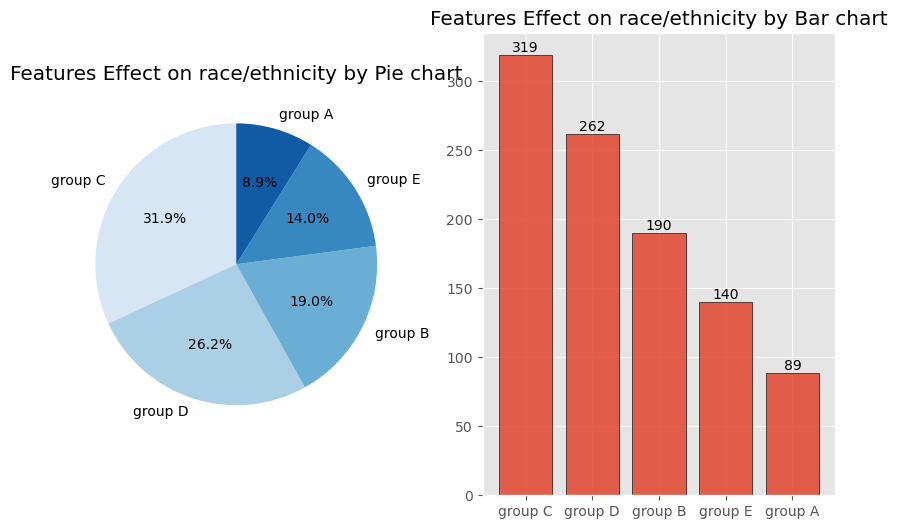

In [78]:
# Choose colors for each feature
colors = sns.color_palette("Blues", 5)

# Set up the figure with subplots
plt.figure(figsize=(10, 6))

# Plot the pie chart
plt.subplot(1, 2, 1)
plt.pie(data_frame[categorical_column[1]].value_counts().values, labels=data_frame[categorical_column[1]].value_counts().index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title(f'Features Effect on {categorical_column[1]} by Pie chart')

# Plot bar chart
plt.subplot(1, 2, 2)
bars = plt.bar(data_frame[categorical_column[1]].value_counts().index, data_frame[categorical_column[1]].value_counts().values, edgecolor='k', alpha=0.88)

# Text on bar chart
for xx,yy in zip(data_frame[categorical_column[1]].value_counts().index, data_frame[categorical_column[1]].value_counts().values):
    plt.text(xx,yy,np.round(yy,1), ha='center', va='bottom', fontsize=10)

plt.title(f'Features Effect on {categorical_column[1]} by Bar chart')

# Display the chart
plt.show()


In [79]:
# there are alot of students in group c more than others

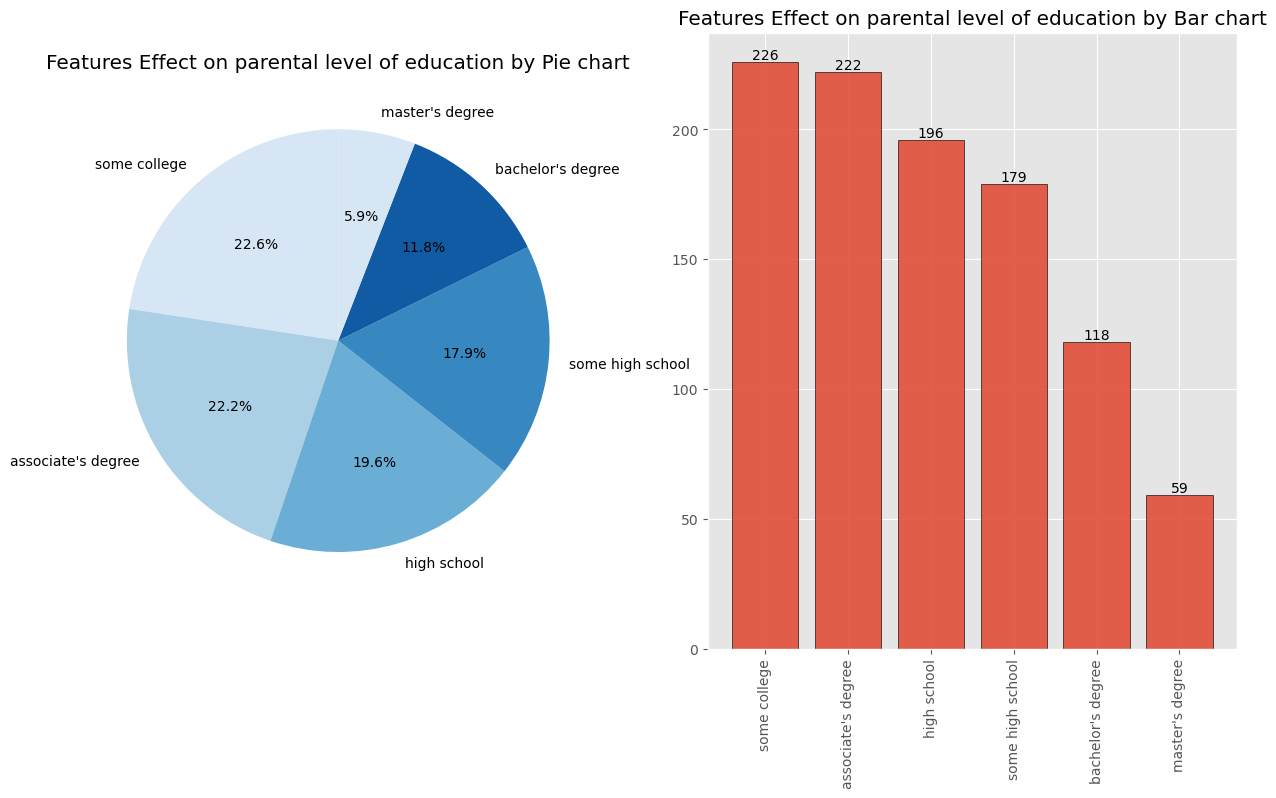

In [81]:
# Choose colors for each feature
colors = sns.color_palette("Blues", 5)

# Set up the figure with subplots
plt.figure(figsize=(15, 8))

# Plot the pie chart
plt.subplot(1, 2, 1)
plt.pie(data_frame[categorical_column[2]].value_counts().values, labels=data_frame[categorical_column[2]].value_counts().index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title(f'Features Effect on {categorical_column[2]} by Pie chart')

# Plot bar chart
plt.subplot(1, 2, 2)
bars = plt.bar(data_frame[categorical_column[2]].value_counts().index, data_frame[categorical_column[2]].value_counts().values, edgecolor='k', alpha=0.88)
plt.xticks(rotation=90)

# Text on bar chart
for xx,yy in zip(data_frame[categorical_column[2]].value_counts().index, data_frame[categorical_column[2]].value_counts().values):
    plt.text(xx,yy,np.round(yy,1), ha='center', va='bottom', fontsize=10)

plt.title(f'Features Effect on {categorical_column[2]} by Bar chart')

# Display the chart
plt.show()


In [82]:
#Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

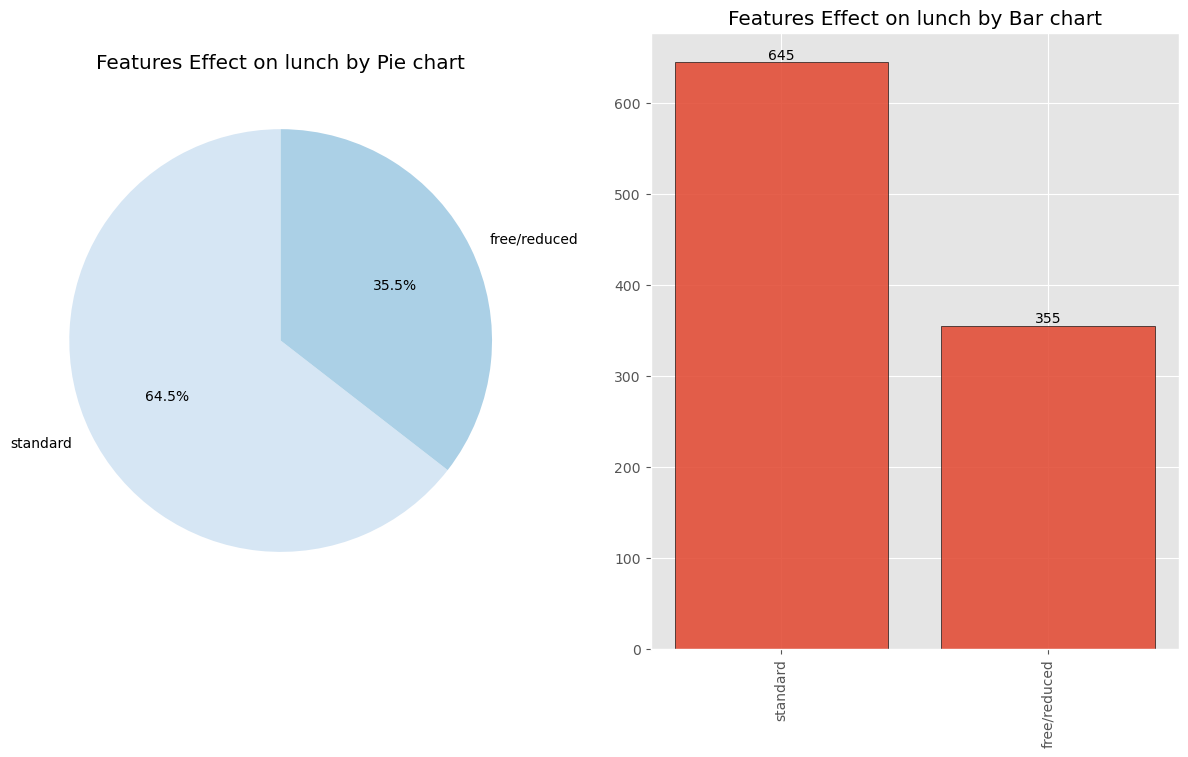

In [83]:
# Choose colors for each feature
colors = sns.color_palette("Blues", 5)

# Set up the figure with subplots
plt.figure(figsize=(15, 8))

# Plot the pie chart
plt.subplot(1, 2, 1)
plt.pie(data_frame[categorical_column[3]].value_counts().values, labels=data_frame[categorical_column[3]].value_counts().index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title(f'Features Effect on {categorical_column[3]} by Pie chart')

# Plot bar chart
plt.subplot(1, 2, 2)
bars = plt.bar(data_frame[categorical_column[3]].value_counts().index, data_frame[categorical_column[3]].value_counts().values, edgecolor='k', alpha=0.88)
plt.xticks(rotation=90)

# Text on bar chart
for xx,yy in zip(data_frame[categorical_column[3]].value_counts().index, data_frame[categorical_column[3]].value_counts().values):
    plt.text(xx,yy,np.round(yy,1), ha='center', va='bottom', fontsize=10)

plt.title(f'Features Effect on {categorical_column[3]} by Bar chart')

# Display the chart
plt.show()


In [84]:
#Number of students who have standard lunch are greater

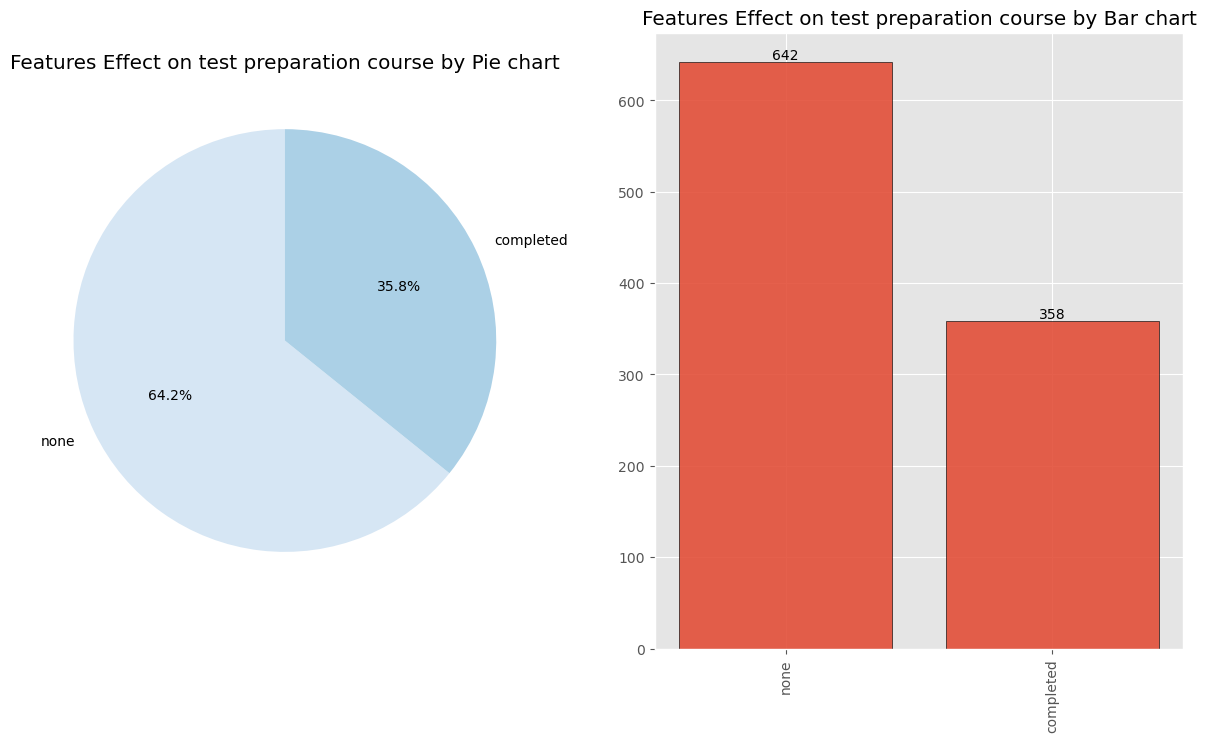

In [85]:
# Choose colors for each feature
colors = sns.color_palette("Blues", 5)

# Set up the figure with subplots
plt.figure(figsize=(15, 8))

# Plot the pie chart
plt.subplot(1, 2, 1)
plt.pie(data_frame[categorical_column[4]].value_counts().values, labels=data_frame[categorical_column[4]].value_counts().index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title(f'Features Effect on {categorical_column[4]} by Pie chart')

# Plot bar chart
plt.subplot(1, 2, 2)
bars = plt.bar(data_frame[categorical_column[4]].value_counts().index, data_frame[categorical_column[4]].value_counts().values, edgecolor='k', alpha=0.88)
plt.xticks(rotation=90)

# Text on bar chart
for xx,yy in zip(data_frame[categorical_column[4]].value_counts().index, data_frame[categorical_column[4]].value_counts().values):
    plt.text(xx,yy,np.round(yy,1), ha='center', va='bottom', fontsize=10)

plt.title(f'Features Effect on {categorical_column[4]} by Bar chart')

# Display the chart
plt.show()


In [86]:
#Number of students who have not enrolled in any test preparation course is greater

### *15.Is gender impacting student's performance?*

<Axes: xlabel='gender', ylabel='math score'>

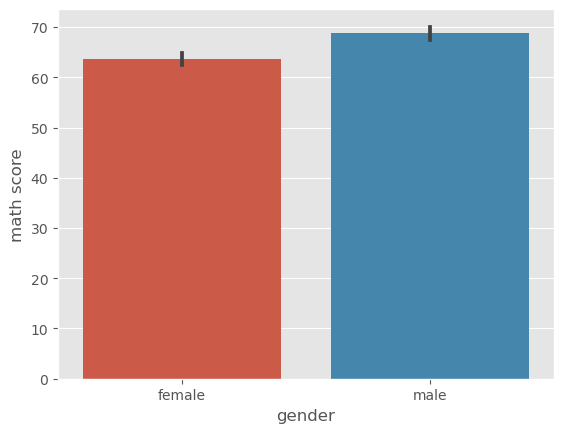

In [88]:
sns.barplot(x='gender',y='math score',data=data_frame)
# from graph we deduce that men has better performance than female

<Axes: xlabel='gender', ylabel='reading score'>

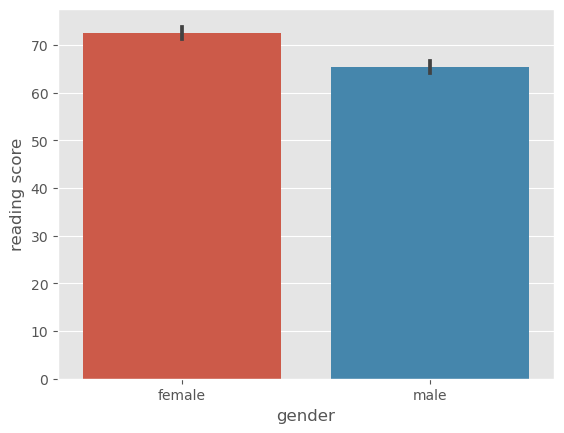

In [89]:
sns.barplot(x='gender',y='reading score',data=data_frame)
#female has better performance than males in reading and writing

<Axes: xlabel='gender', ylabel='writing score'>

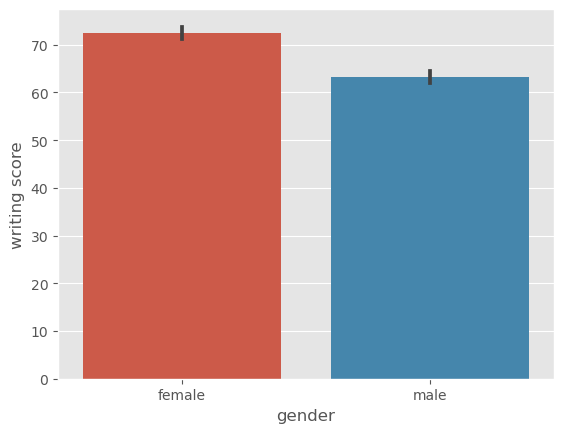

In [90]:
sns.barplot(x='gender',y='writing score',data=data_frame)

### *16.Showing Outliers for Average*

<Axes: xlabel='average_score'>

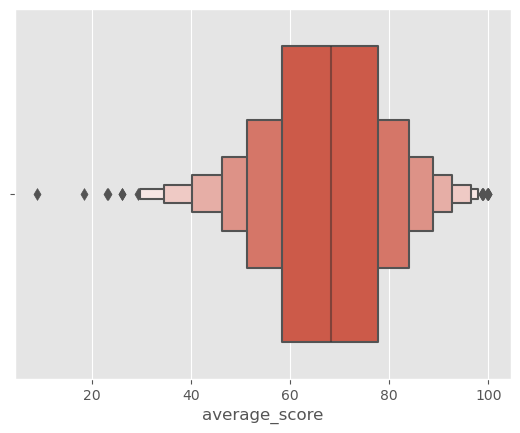

In [95]:
sns.boxenplot(x='average_score',data=data_frame)

In [96]:
#Student's performance is correlated with factors such as lunch, race
#Females have a higher pass percentage and also achieve top scores in writing and reading.
#Student's performance doesn't show a strong correlation with completing a test preparation course.
#Completing a preparation course has shown to be beneficial.

# *Joe Amin*